In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import cv2
import numpy as np
import matplotlib.pyplot as plt

from lumivid.utils.video_utils import get_video, get_frame_mask, get_frame_from_video
from lumivid.preprocessing.scene_preprocessing import mask_reframe_frame, preprocess_frame

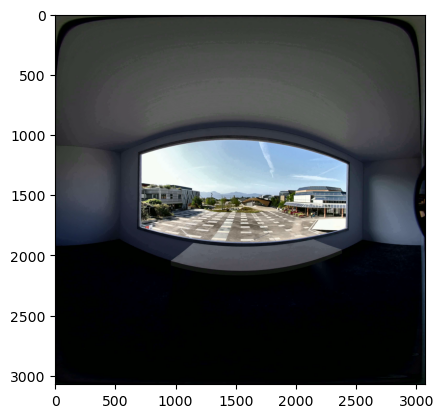

In [20]:
scene_path = '../data/preprocessing/processed_scenes/P1Scene01.mp4'
video = get_video(scene_path)
frame, _ = get_frame_from_video(video, 0, split=False, masked=False, reframed=False)
frame = frame[:, :, ::-1]

plt.imshow(frame)
plt.show()

C:\Users\arnau\AppData\Local\Temp\ipykernel_14160\919396529.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


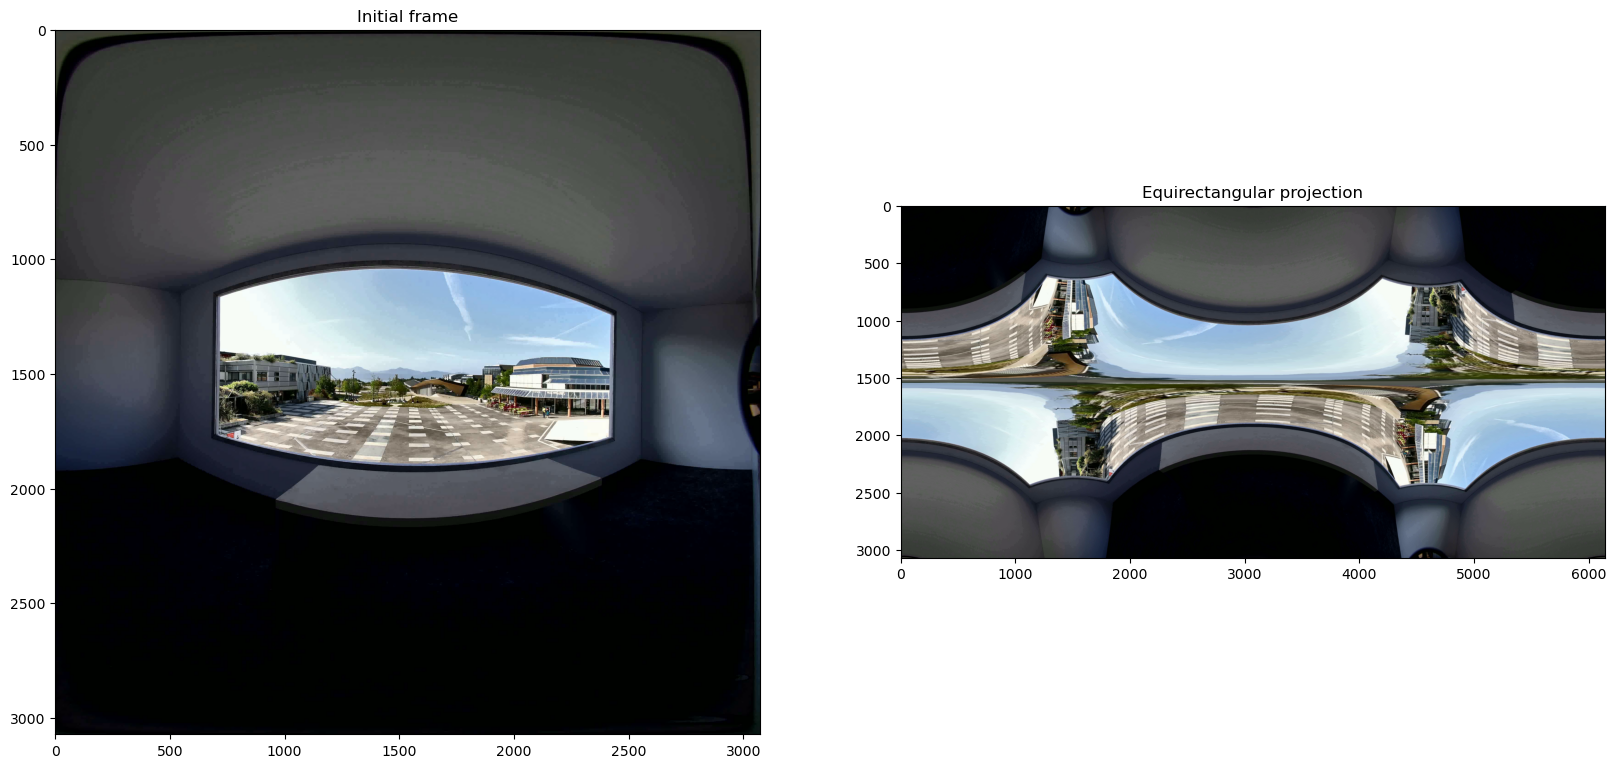

In [15]:
import math
from skimage.transform import warp

def fisheye_to_equirectangular(fisheye_img):
    height, width, _ = fisheye_img.shape
    
    # The output image dimensions
    equi_height = height
    equi_width = 2 * width
    
    equirectangular = np.zeros((equi_height, equi_width, 3), dtype=np.uint8)

    # For each pixel in the output image
    for i in range(equi_height):
        for j in range(equi_width):
            
            # Convert equirectangular coordinates to polar coordinates
            theta = (j / equi_width) * 2 * np.pi
            phi = (i / equi_height) * np.pi
            
            # Convert polar to fisheye pixel coordinates
            r = height / 2 - i
            x = int(width / 2 + r * np.sin(theta))
            y = int(height / 2 + r * np.cos(theta))
            
            if 0 <= x < width and 0 <= y < height:
                equirectangular[i, j, :] = fisheye_img[y, x, :]

    return equirectangular

equirectangular_img = fisheye_to_equirectangular(frame)

# Show the equirectangular image
plt.subplots(figsize=(20, 10))
plt.subplot(121)
plt.imshow(frame)
plt.title('Initial frame')
plt.subplot(122)
plt.imshow(equirectangular_img)
plt.title('Equirectangular projection')
plt.show()